In [1]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import math

## Utils

Functions for eq. (19) and eq. (20) in Proposition 5.

In [2]:
def post_g(mu_g, u_gT, lamb, Qg_v):
    return mu_g * math.exp (u_gT * Qg_v / lamb)

def post_b(mu_b, u_bF, lamb, Qb_v):
    return mu_b * math.exp (u_bF * Qb_v / lamb)

def post_r(mu_g, u_gT, u_bF, lamb, Qb_v):
    return post_g(mu_g, u_gT, lamb, 1-Qb_v)/(post_g(mu_g, u_gT, lamb, 1-Qb_v)+post_b(1-mu_g, u_bF, lamb, Qb_v)), post_b(1-mu_g, u_bF, lamb, Qb_v)/(post_g(mu_g, u_gT, lamb, 1-Qb_v)+post_b(1-mu_g, u_bF, lamb, Qb_v))

The reward function designed according to eq. (21)

In [3]:
def reward_function(mu_g, lamb, Qb_v, kappa):
    reward = 2 * lamb * abs(1/(Qb_v-(1-Qb_v))) * math.log(kappa * (mu_g/(1-mu_g)))
    return reward

For accountability (TPR) and wrongful accountability (FPR) as defined in Definition 3 and Definition 4.

In [4]:
def tpr_fpr(Qb, Qg, mu_g=0.5, u_gT=1, u_bF=1, lamb=1):
    tpr, fpr = 0, 0
    for i in range(len(Qb)):
        tpr += Qb[i] * post_r(mu_g, u_gT, u_bF, lamb, Qb[i]/(Qb[i]+Qg[i]))[1]
        fpr += Qg[i] * post_r(mu_g, u_gT, u_bF, lamb, Qb[i]/(Qb[i]+Qg[i]))[1]
    return tpr, fpr

## Figure 4

The trend between the auditor’s compliance/non-compliance confidence and the auditor’s epistemic factor.

### 4(a)

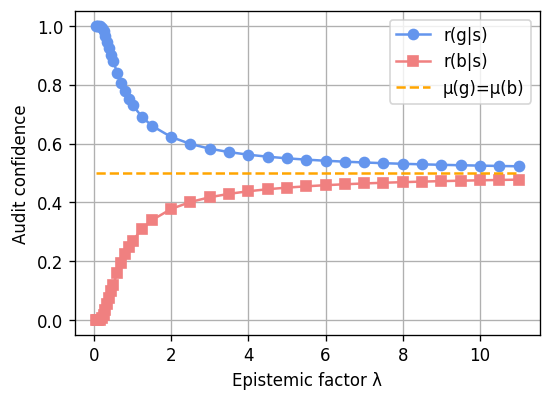

In [5]:
r_gs, r_bs=[], []
lamb_list = [0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6,
             0.7, 0.8, 0.9, 1, 1.25, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6,
             6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11]
for lamb in lamb_list:
    temp1, temp2 = post_r(0.5, 2, 2, lamb, 0.25)
    r_gs.append(temp1)
    r_bs.append(temp2)

plt.figure(figsize=(5, 3.5), dpi=120)
plt.plot(lamb_list, r_gs, color='cornflowerblue', linestyle='-', marker='o', label="r(g|s)")
plt.plot(lamb_list, r_bs, color='lightcoral', linestyle='-', marker='s', label="r(b|s)")
plt.plot(lamb_list, [0.5 for _ in lamb_list], color='orange', linestyle='--', label="μ(g)=μ(b)")
plt.legend(loc="best")
plt.xlabel("Epistemic factor λ")
plt.ylabel("Audit confidence")
plt.grid(True)
plt.savefig('4a.png')
plt.show()

### 4(b)

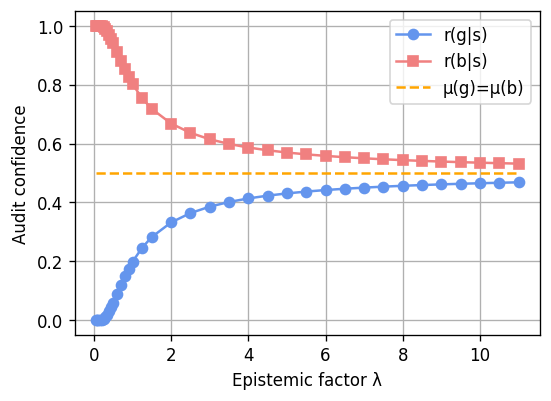

In [6]:
r_gs, r_bs=[], []
lamb_list = [0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6,
             0.7, 0.8, 0.9, 1, 1.25, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6,
             6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11]
for lamb in lamb_list:
    temp1, temp2 = post_r(0.5, 2, 2, lamb, 0.85)
    r_gs.append(temp1)
    r_bs.append(temp2)

plt.figure(figsize=(5, 3.5), dpi=120)
plt.plot(lamb_list, r_gs, 'cornflowerblue', linestyle='-', marker='o', label="r(g|s)")
plt.plot(lamb_list, r_bs, 'lightcoral', linestyle='-', marker='s', label="r(b|s)")
plt.plot(lamb_list, [0.5 for _ in lamb_list], color='orange', linestyle='--', label="μ(g)=μ(b)")
plt.legend(loc="best")
plt.xlabel("Epistemic factor λ")
plt.ylabel("Audit confidence")
plt.grid(True)
plt.savefig('4b.png')
plt.show()

### 4(c)

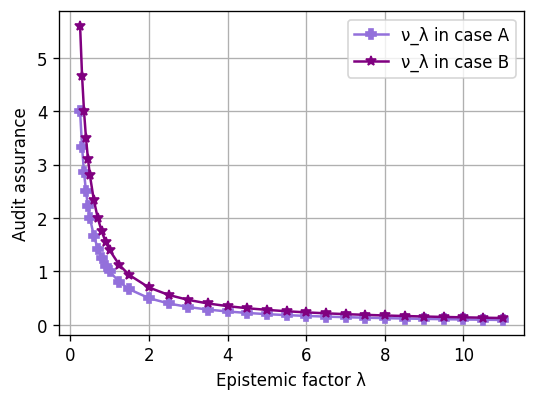

In [7]:
lamb_list = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6,
             0.7, 0.8, 0.9, 1, 1.25, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6,
             6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11]
r_gs, r_bs=[], []
for lamb in lamb_list:
    temp1, temp2 = post_r(0.5, 2, 2, lamb, 0.25)
    r_gs.append(temp1)
    r_bs.append(temp2)

r_gs1, r_bs1=[], []
for lamb in lamb_list:
    temp1, temp2 = post_r(0.5, 2, 2, lamb, 0.85)
    r_gs1.append(temp1)
    r_bs1.append(temp2)

plt.figure(figsize=(5, 3.5), dpi=120)
plt.plot(lamb_list, [abs(math.log(r_bs[i]/r_gs[i])) for i in range(len(lamb_list))], color='mediumpurple', linestyle='-', marker='P', label="ν_λ in case A")
plt.plot(lamb_list, [abs(math.log(r_bs1[i]/r_gs1[i])) for i in range(len(lamb_list))], color='purple', linestyle='-', marker='*', label="ν_λ in case B")

plt.legend(loc="best")
plt.xlabel("Epistemic factor λ")
plt.ylabel("Audit assurance")
plt.grid(True)
plt.savefig('4c.png')
plt.show()

## Figure 5

The trend between the audit performance and the negli-
gent developer's executed privacy budget choices that leads to
different negligence fractions

### 5(a)

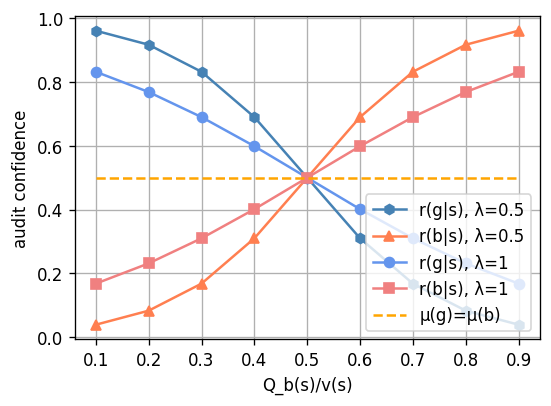

In [8]:
r_gs_5, r_bs_5=[], []
Q_b_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for Q_b in Q_b_list:
    temp1, temp2 = post_r(0.5, 2, 2, 0.5, Q_b)
    r_gs_5.append(temp1)
    r_bs_5.append(temp2)

r_gs_10, r_bs_10=[], []
Q_b_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for Q_b in Q_b_list:
    temp1, temp2 = post_r(0.5, 2, 2, 1, Q_b)
    r_gs_10.append(temp1)
    r_bs_10.append(temp2)

plt.figure(figsize=(5, 3.5), dpi=120)
plt.plot(Q_b_list, r_gs_5, "steelblue", linestyle='-', marker='h', label="r(g|s), λ=0.5")
plt.plot(Q_b_list, r_bs_5, "coral", linestyle='-', marker='^', label="r(b|s), λ=0.5")
plt.plot(Q_b_list, r_gs_10,"cornflowerblue", linestyle='-', marker='o', label="r(g|s), λ=1")
plt.plot(Q_b_list, r_bs_10,"lightcoral", linestyle='-', marker='s', label="r(b|s), λ=1")
plt.plot(Q_b_list, [0.5 for _ in Q_b_list], color='orange', linestyle='--', label="μ(g)=μ(b)")
plt.legend(loc="lower right")
plt.xlabel("Q_b(s)/v(s)")
plt.ylabel("audit confidence")
plt.grid(True)
plt.savefig('5a.png')
plt.show()

### 5(b)

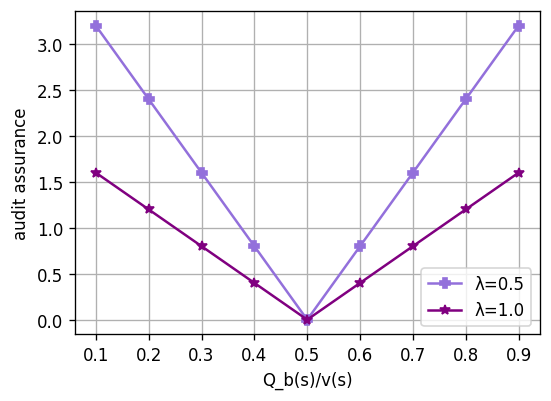

In [9]:
r_gs_5, r_bs_5=[], []
Q_b_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for Q_b in Q_b_list:
    temp1, temp2 = post_r(0.5, 2, 2, 0.5, Q_b)
    r_gs_5.append(temp1)
    r_bs_5.append(temp2)

r_gs_10, r_bs_10=[], []
Q_b_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for Q_b in Q_b_list:
    temp1, temp2 = post_r(0.5, 2, 2, 1, Q_b)
    r_gs_10.append(temp1)
    r_bs_10.append(temp2)

plt.figure(figsize=(5, 3.5), dpi=120)
plt.plot(Q_b_list, [abs(math.log(r_bs_5[i]/r_gs_5[i])) for i in range(len(Q_b_list))], color='mediumpurple', linestyle='-', marker='P', label="λ=0.5")
plt.plot(Q_b_list, [abs(math.log(r_bs_10[i]/r_gs_10[i])) for i in range(len(Q_b_list))], color='purple', linestyle='-', marker='*', label="λ=1.0")

plt.legend(loc="lower right")
plt.xlabel("Q_b(s)/v(s)")
plt.ylabel("audit assurance")
plt.grid(True)
plt.savefig('5b.png')
plt.show()

## Figure 6

Trends between the audit confidence and the rewards.

### 6(a)

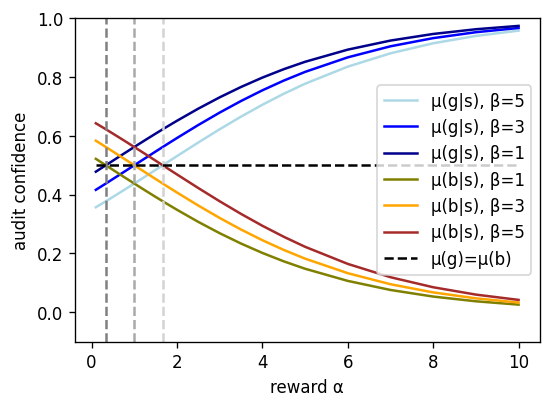

In [10]:
r_gs, r_bs=[], []
r_gs1, r_bs1=[], []
r_gs2, r_bs2=[], []
ab_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.5, 3, 3.5, 4, 4.5, 5, 6, 7, 8, 9, 10]
for ab in ab_list:
    temp1, temp2 = post_r(0.5, ab, 1, 2, 0.25)
    r_gs.append(temp1)
    r_bs.append(temp2)
    temp1, temp2 = post_r(0.5, ab, 3, 2, 0.25)
    r_gs1.append(temp1)
    r_bs1.append(temp2)
    temp1, temp2 = post_r(0.5, ab, 5, 2, 0.25)
    r_gs2.append(temp1)
    r_bs2.append(temp2)

plt.figure(figsize=(5, 3.5), dpi=120)

plt.plot(ab_list, r_gs2, 'lightblue', label="μ(g|s), β=5")
plt.plot(ab_list, r_gs1, 'blue', label="μ(g|s), β=3")
plt.plot(ab_list, r_gs, 'darkblue', label="μ(g|s), β=1")
plt.plot(ab_list, r_bs, 'olive', label="μ(b|s), β=1")
plt.plot(ab_list, r_bs1, 'orange', label="μ(b|s), β=3")
plt.plot(ab_list, r_bs2, 'brown', label="μ(b|s), β=5")
plt.axvline(x=0.33, color='grey', linestyle='--')
plt.axvline(x=1, color='darkgrey', linestyle='--')
plt.axvline(x=1.67, color='lightgrey', linestyle='--')

plt.plot(ab_list, [0.5 for _ in ab_list], "k--", label="μ(g)=μ(b)")
plt.legend(loc="best")
plt.xlabel("reward α")
plt.ylabel("audit confidence")
plt.savefig('6a.png')
plt.ylim(-0.1, 1)
plt.show()

### 6(b)

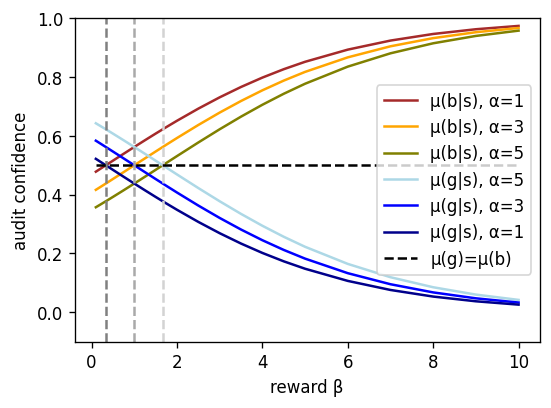

In [11]:
r_gs, r_bs=[], []
r_gs1, r_bs1=[], []
r_gs2, r_bs2=[], []
ab_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.5, 3, 3.5, 4, 4.5, 5, 6, 7, 8, 9, 10]
for ab in ab_list:
    temp1, temp2 = post_r(0.5, 1, ab, 2, 0.75)
    r_gs.append(temp1)
    r_bs.append(temp2)
    temp1, temp2 = post_r(0.5, 3, ab, 2, 0.75)
    r_gs1.append(temp1)
    r_bs1.append(temp2)
    temp1, temp2 = post_r(0.5, 5, ab, 2, 0.75)
    r_gs2.append(temp1)
    r_bs2.append(temp2)

plt.figure(figsize=(5, 3.5), dpi=120)
plt.plot(ab_list, r_bs, 'brown', label="μ(b|s), α=1")
plt.plot(ab_list, r_bs1, 'orange', label="μ(b|s), α=3")
plt.plot(ab_list, r_bs2, 'olive', label="μ(b|s), α=5")
plt.plot(ab_list, r_gs2, 'lightblue', label="μ(g|s), α=5")
plt.plot(ab_list, r_gs1, 'blue', label="μ(g|s), α=3")
plt.plot(ab_list, r_gs, 'darkblue', label="μ(g|s), α=1")
plt.axvline(x=0.33, color='grey', linestyle='--')
plt.axvline(x=1, color='darkgrey', linestyle='--')
plt.axvline(x=1.67, color='lightgrey', linestyle='--')

plt.plot(ab_list, [0.5 for _ in ab_list], "k--", label="μ(g)=μ(b)")
plt.legend(loc="best")
plt.xlabel("reward β")
plt.ylabel("audit confidence")
plt.savefig('6b.png')
plt.ylim(-0.1, 1)
plt.show()

## Figure 7

The region for feasible rewards.

### 7(a)

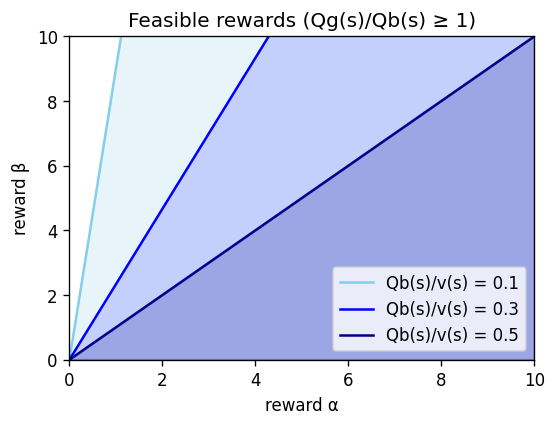

In [12]:
Q_b_list = [0.1, 0.3, 0.5]
alpha_values = {i:[] for i in Q_b_list}
beta_values = {i:[] for i in Q_b_list}

def beta_g_greater_b(alpha, qb):
    return alpha * ((1-qb)/qb)

for i in Q_b_list:
    alpha_values[i] = np.linspace(0, 10, 25)
    beta_values[i] = beta_g_greater_b(alpha_values[i], i)

plt.figure(figsize=(5, 3.5), dpi=120)
plt.plot(alpha_values[0.1], beta_values[0.1], color='skyblue', label='Qb(s)/v(s) = 0.1')
plt.plot(alpha_values[0.3], beta_values[0.3], color='blue', label='Qb(s)/v(s) = 0.3')
plt.plot(alpha_values[0.5], beta_values[0.5], color='darkblue', label='Qb(s)/v(s) = 0.5')

plt.fill_between(alpha_values[0.1], beta_values[0.1], color='skyblue', alpha=0.2)
plt.fill_between(alpha_values[0.3], beta_values[0.3], color='blue', alpha=0.15)
plt.fill_between(alpha_values[0.5], beta_values[0.5], color='darkblue', alpha=0.2)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel("reward α")
plt.ylabel("reward β")
plt.title('Feasible rewards (Qg(s)/Qb(s) ≥ 1)')
plt.legend(loc="best")
plt.savefig('7a.png')
plt.show()

### 7(b)

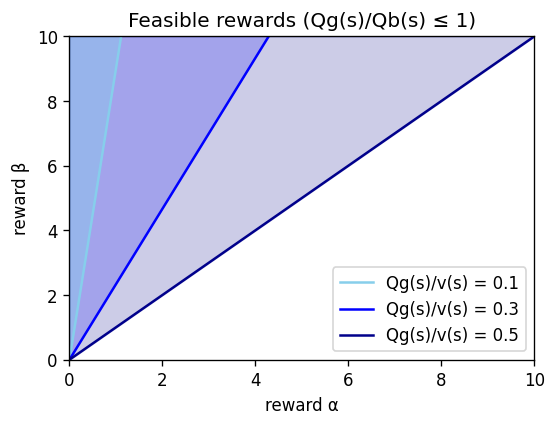

In [13]:
Q_g_list = [0.1, 0.3, 0.5]
alpha_values = {i:[] for i in Q_g_list}
beta_values = {i:[] for i in Q_g_list}

def beta_g_less_b(alpha, qg):
    return alpha * ((qg)/(1-qg))

for i in Q_b_list:
    alpha_values[i] = np.linspace(0, 10, 25)
    beta_values[i] = beta_g_greater_b(alpha_values[i], i)

plt.figure(figsize=(5, 3.5), dpi=120)
plt.plot(alpha_values[0.1], beta_values[0.1], color='skyblue', label='Qg(s)/v(s) = 0.1')
plt.plot(alpha_values[0.3], beta_values[0.3], color='blue', label='Qg(s)/v(s) = 0.3')
plt.plot(alpha_values[0.5], beta_values[0.5], color='darkblue', label='Qg(s)/v(s) = 0.5')

baseline = np.zeros_like(beta_values[0.1])
plt.fill_between(alpha_values[0.5], beta_values[0.5], beta_values[0.5].max(), color='darkblue', alpha=0.2)
plt.fill_between(alpha_values[0.3], beta_values[0.3], beta_values[0.3].max(), color='blue', alpha=0.2)
plt.fill_between(alpha_values[0.1], beta_values[0.1], beta_values[0.1].max(), color='skyblue', alpha=0.4)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel("reward α")
plt.ylabel("reward β")
plt.title('Feasible rewards (Qg(s)/Qb(s) ≤ 1)')
plt.legend(loc="best")
plt.savefig('7b.png')
plt.show()

## Figure 8

Trends of total rewards $V$ under different desired $\kappa$
with different distinguishability

### 8(a)

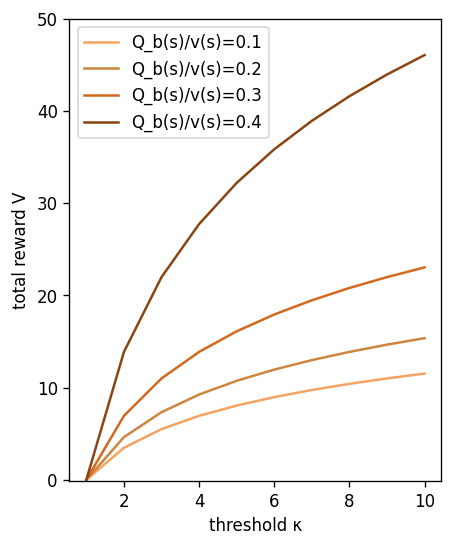

In [14]:
kappa_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Q_b_list = [1, 2, 3, 4, 6, 7, 8, 9]
rewards = {qb:[] for qb in Q_b_list}
for qb in Q_b_list:
    for k in kappa_list:
        temp = reward_function(0.5, 2, qb/10, k)
        rewards[qb].append(temp)

colors = {
    1: "sandybrown",
    2: "peru",
    3: "chocolate",
    4: "saddlebrown",
    6: "navy",
    7: "royalblue",
    8: "cornflowerblue",
    9: "lightsteelblue",
}
plt.figure(figsize=(4, 5), dpi=120)
for qb in Q_b_list:
    if qb < 5:
        plt.plot(kappa_list, rewards[qb], colors[qb], label=f"Q_b(s)/v(s)={qb/10.0}")

plt.legend(loc="best")
plt.xlabel("threshold κ")
plt.ylabel("total reward V")
plt.ylim(-0.1, 50)
plt.savefig('8a.png')
plt.show()

### 8(b)

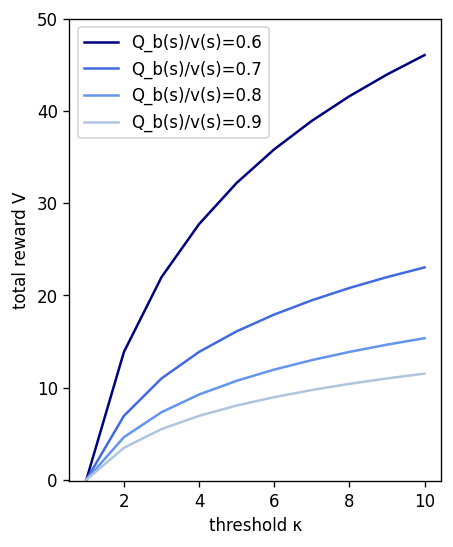

In [15]:
kappa_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Q_b_list = [1, 2, 3, 4, 6, 7, 8, 9]
rewards = {qb:[] for qb in Q_b_list}
for qb in Q_b_list:
    for k in kappa_list:
        temp = reward_function(0.5, 2, qb/10, k)
        rewards[qb].append(temp)

colors = {
    1: "sandybrown",
    2: "peru",
    3: "chocolate",
    4: "saddlebrown",
    6: "navy",
    7: "royalblue",
    8: "cornflowerblue",
    9: "lightsteelblue",
}
plt.figure(figsize=(4, 5), dpi=120)
for qb in Q_b_list:
    if qb > 5:
        plt.plot(kappa_list, rewards[qb], colors[qb], label=f"Q_b(s)/v(s)={qb/10.0}")

plt.legend(loc="best")
plt.xlabel("threshold κ")
plt.ylabel("total reward V")
plt.ylim(-0.1, 50)
plt.savefig('8b.png')
plt.show()

## Figure 9

The ROC curve in the case where the distributions for
the hypotheses exhibit greater distinguishability.

### 9(a)

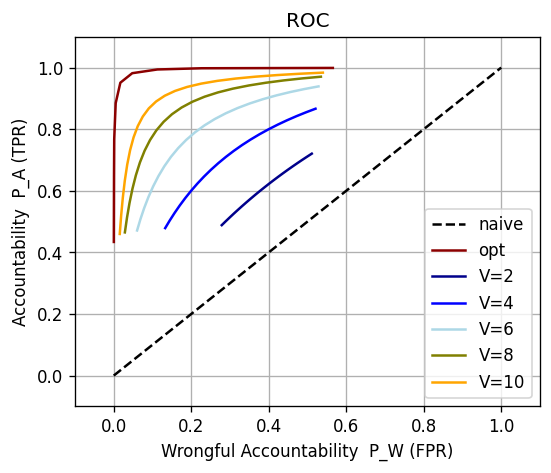

In [16]:
n=20
pg = 0.3
pb = 0.7

x = np.arange(n)
Q_b = binom.pmf(x, n, pb)
Q_g = binom.pmf(x, n, pg)

bench_tpr, bench_fpr = [], []
for u in [i / 10 for i in range(1, 500+1, 2)]:
    tpr, fpr = tpr_fpr(Q_b, Q_g, mu_g=0.5, u_gT=u, u_bF=50-u, lamb=0.1)
    bench_tpr.append(tpr)
    bench_fpr.append(fpr)

V_list = [2, 4, 6, 8, 10]
TPR = {i:[] for i in V_list}
FPR = {i:[] for i in V_list}

for V in V_list:
    for u in [i / 10 for i in range(0, V*10+1, V//2)]:
        tpr, fpr = tpr_fpr(Q_b, Q_g, mu_g=0.5, u_gT=u, u_bF=V-u, lamb=2)
        TPR[V].append(tpr)
        FPR[V].append(fpr)

plt.figure(figsize=(5, 4), dpi=120)

plt.plot([i/10 for i in range(11)], [i/10 for i in range(11)], '--', color='black', label='naive')
plt.plot(bench_fpr, bench_tpr, color='darkred', label='opt')
plt.plot(FPR[2], TPR[2], color='darkblue', label='V=2')
plt.plot(FPR[4], TPR[4], color='blue', label='V=4')
plt.plot(FPR[6], TPR[6], color='lightblue', label='V=6')
plt.plot(FPR[8], TPR[8], color='olive', label='V=8')
plt.plot(FPR[10], TPR[10], color='orange', label='V=10')
plt.xlabel('Wrongful Accountability  P_W (FPR)')
plt.ylabel('Accountability  P_A (TPR)')
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.legend(loc='best')
plt.title('ROC')
plt.grid(True)
plt.savefig('9a.png')
plt.show()

### 9(b)

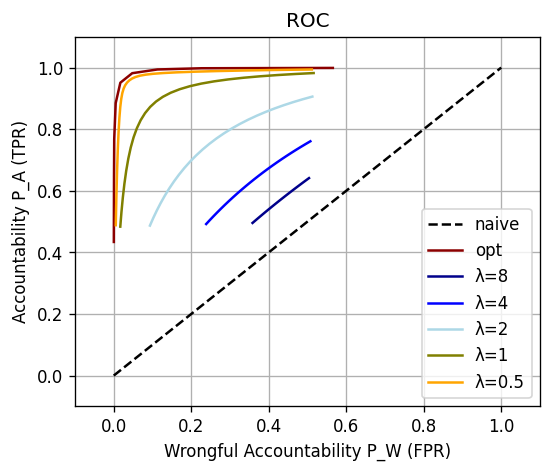

In [17]:
n=20
pg = 0.3
pb = 0.7

x = np.arange(n)
Q_b = binom.pmf(x, n, pb)
Q_g = binom.pmf(x, n, pg)

bench_tpr, bench_fpr = [], []
for u in [i / 10 for i in range(1, 500+1, 2)]:
    tpr, fpr = tpr_fpr(Q_b, Q_g, mu_g=0.5, u_gT=u, u_bF=50-u, lamb=0.1)
    bench_tpr.append(tpr)
    bench_fpr.append(fpr)

lambda_list = [0.5, 1, 2, 4, 8]
TPR = {i:[] for i in lambda_list}
FPR = {i:[] for i in lambda_list}

for l in lambda_list:
    for u in [i / 10 for i in range(1, 50+1, 2)]:
        tpr, fpr = tpr_fpr(Q_b, Q_g, mu_g=0.5, u_gT=u, u_bF=5-u, lamb=l)
        TPR[l].append(tpr)
        FPR[l].append(fpr)

plt.figure(figsize=(5, 4), dpi=120)

plt.plot([i/10 for i in range(11)], [i/10 for i in range(11)], '--', color='black', label='naive')
plt.plot(bench_fpr, bench_tpr, color='darkred', label='opt')
plt.plot(FPR[8], TPR[8], color='darkblue', label='λ=8')
plt.plot(FPR[4], TPR[4],  color='blue', label='λ=4')
plt.plot(FPR[2], TPR[2],  color='lightblue', label='λ=2')
plt.plot(FPR[1], TPR[1],  color='olive', label='λ=1')
plt.plot(FPR[0.5], TPR[0.5],  color='orange', label='λ=0.5')
plt.xlabel('Wrongful Accountability P_W (FPR)')
plt.ylabel('Accountability P_A (TPR)')
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.legend(loc='best')
plt.title('ROC')
plt.grid(True)
plt.savefig('9b.png')
plt.show()

## Figure 10

The ROC curve in the case where the distributions
for the hypotheses exhibit less distinguishability.

### 10(a)

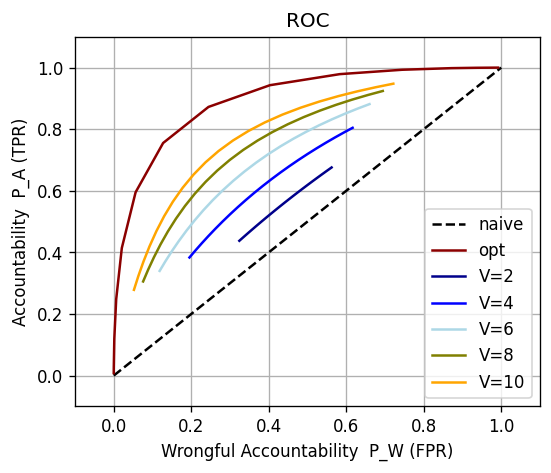

In [18]:
n=20
pg = 0.4
pb = 0.6

x = np.arange(n)
Q_b = binom.pmf(x, n, pb)
Q_g = binom.pmf(x, n, pg)

bench_tpr, bench_fpr = [], []
for u in [i / 10 for i in range(1, 500+1, 2)]:
    tpr, fpr = tpr_fpr(Q_b, Q_g, mu_g=0.5, u_gT=u, u_bF=50-u, lamb=0.1)
    bench_tpr.append(tpr)
    bench_fpr.append(fpr)

V_list = [2, 4, 6, 8, 10]
TPR = {i:[] for i in V_list}
FPR = {i:[] for i in V_list}

for V in V_list:
    for u in [i / 10 for i in range(0, V*10+1, V//2)]:
        tpr, fpr = tpr_fpr(Q_b, Q_g, mu_g=0.5, u_gT=u, u_bF=V-u, lamb=2)
        TPR[V].append(tpr)
        FPR[V].append(fpr)

plt.figure(figsize=(5, 4), dpi=120)

plt.plot([i/10 for i in range(11)], [i/10 for i in range(11)], '--', color='black', label='naive')
plt.plot(bench_fpr, bench_tpr, color='darkred', label='opt')
plt.plot(FPR[2], TPR[2], color='darkblue', label='V=2')
plt.plot(FPR[4], TPR[4], color='blue', label='V=4')
plt.plot(FPR[6], TPR[6], color='lightblue', label='V=6')
plt.plot(FPR[8], TPR[8], color='olive', label='V=8')
plt.plot(FPR[10], TPR[10], color='orange', label='V=10')
plt.xlabel('Wrongful Accountability  P_W (FPR)')
plt.ylabel('Accountability  P_A (TPR)')
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.legend(loc='best')
plt.title('ROC')
plt.grid(True)
plt.savefig('10a.png')
plt.show()

### 10(b)

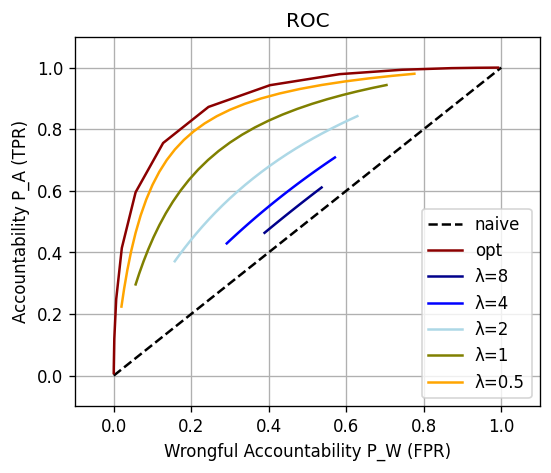

In [19]:
n=20
pg = 0.4
pb = 0.6

x = np.arange(n)
Q_b = binom.pmf(x, n, pb)
Q_g = binom.pmf(x, n, pg)

bench_tpr, bench_fpr = [], []
for u in [i / 10 for i in range(1, 500+1, 2)]:
    tpr, fpr = tpr_fpr(Q_b, Q_g, mu_g=0.5, u_gT=u, u_bF=50-u, lamb=0.1)
    bench_tpr.append(tpr)
    bench_fpr.append(fpr)

lambda_list = [0.5, 1, 2, 4, 8]
TPR = {i:[] for i in lambda_list}
FPR = {i:[] for i in lambda_list}

for l in lambda_list:
    for u in [i / 10 for i in range(1, 50+1, 2)]:
        tpr, fpr = tpr_fpr(Q_b, Q_g, mu_g=0.5, u_gT=u, u_bF=5-u, lamb=l)
        TPR[l].append(tpr)
        FPR[l].append(fpr)

plt.figure(figsize=(5, 4), dpi=120)

plt.plot([i/10 for i in range(11)], [i/10 for i in range(11)], '--', color='black', label='naive')
plt.plot(bench_fpr, bench_tpr, color='darkred', label='opt')
plt.plot(FPR[8], TPR[8], color='darkblue', label='λ=8')
plt.plot(FPR[4], TPR[4],  color='blue', label='λ=4')
plt.plot(FPR[2], TPR[2],  color='lightblue', label='λ=2')
plt.plot(FPR[1], TPR[1],  color='olive', label='λ=1')
plt.plot(FPR[0.5], TPR[0.5],  color='orange', label='λ=0.5')
plt.xlabel('Wrongful Accountability P_W (FPR)')
plt.ylabel('Accountability P_A (TPR)')
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.legend(loc='best')
plt.title('ROC')
plt.grid(True)
plt.savefig('10b.png')
plt.show()